#### **Import Necessary Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

#### **Load and Explore the Dataset**


In [3]:
data = pd.read_csv("Student_Performance.csv")

In [4]:
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,5,69,No,8,2,51.0
1,2,46,Yes,4,8,20.0
2,7,56,Yes,7,5,46.0
3,6,42,Yes,8,5,28.0
4,7,53,No,4,6,41.0
5,9,63,No,4,7,59.0
6,6,59,Yes,4,1,48.0
7,6,96,No,9,7,87.0
8,7,46,No,7,8,37.0
9,7,79,Yes,9,4,73.0


In [5]:
data.shape

(3000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     3000 non-null   int64  
 1   Previous Scores                   3000 non-null   int64  
 2   Extracurricular Activities        3000 non-null   object 
 3   Sleep Hours                       3000 non-null   int64  
 4   Sample Question Papers Practiced  3000 non-null   int64  
 5   Performance Index                 3000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 140.8+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,3000.0,5.012333,2.572752,1.0,3.0,5.0,7.0,9.0
Previous Scores,3000.0,69.079667,17.346920,40.0,54.0,69.0,84.0,99.0
Sleep Hours,3000.0,6.504000,1.693598,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,3000.0,4.498333,2.864856,0.0,2.0,4.0,7.0,9.0
Performance Index,3000.0,54.816667,19.240143,10.0,40.0,55.0,70.0,99.0


**Distribution of Performance Index**

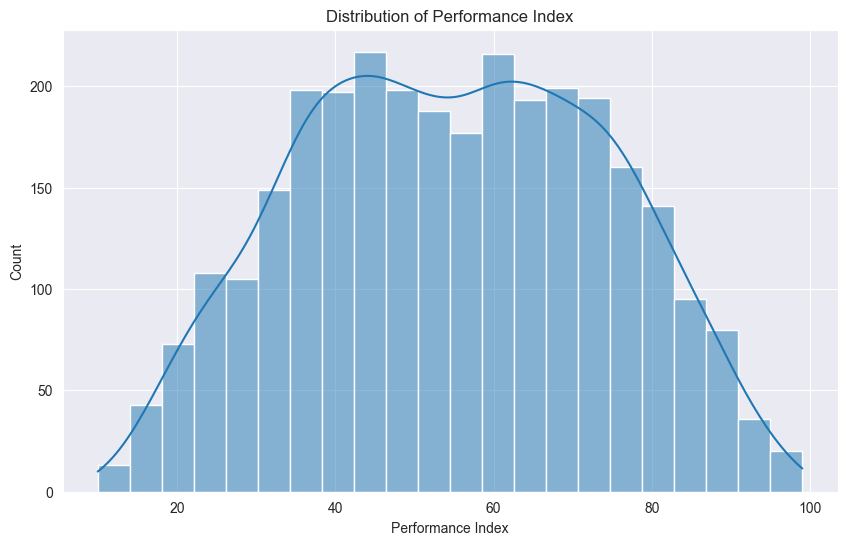

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Performance Index", kde=True)
plt.title("Distribution of Performance Index")
plt.show()

**Distribution of Extracurricular Activities**

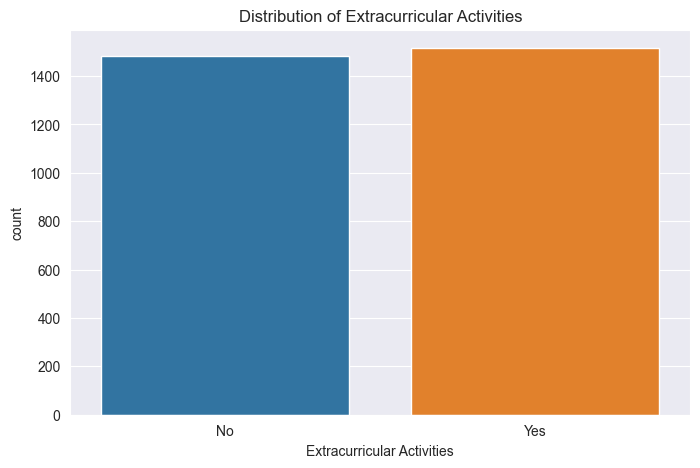

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Extracurricular Activities",hue="Extracurricular Activities")
plt.title("Distribution of Extracurricular Activities")
plt.show()

#### **Data Preprocessing**


**Encode categorical variable**


In [10]:
data["Extracurricular Activities"] = data["Extracurricular Activities"].map(
    {"No": 0, "Yes": 1}
)

**Separate features (X) and target variable (y)**


In [11]:
X = data.drop("Performance Index", axis=1).values
y = data["Performance Index"].values.reshape(-1, 1)

**Split the dataset into training and testing sets**


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [14]:
y_train.shape, y_test.shape

((2010, 1), (990, 1))

**Feature Scaling**


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [17]:
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)

#### **Train the Linear Regression Model**


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

#### **Make Predictions and Evaluate the Model**


**Make predictions on the test set**


In [20]:
y_test_pred = linear_reg_model.predict(X_test)
y_test_pred = sc_y.inverse_transform(y_test_pred)

**Make predictions on the training set**


In [21]:
y_train_pred = linear_reg_model.predict(X_train)
y_train_pred = sc_y.inverse_transform(y_train_pred)

**Evaluate the Model**


In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_test = r2_score(sc_y.inverse_transform(y_test), y_test_pred)
print(f"R² Score (Test): {r2_test:.6f}")

R² Score (Test): 0.988725


In [24]:
r2_train = r2_score(sc_y.inverse_transform(y_train), y_train_pred)
print(f"R² Score (Train): {r2_train:.6f}")

R² Score (Train): 0.989291
